A rocky data analysis about the band <span style="font-family:'Boucherie Block';">ALL THEM WITCHES</span>

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
import numpy as np

In [2]:
# get the fonts Boucherie Block and Rockabilly
sns.set()
from matplotlib import font_manager
font_path = '/Users/johannakruger/Library/Fonts/Boucherie Block.otf'
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

font_path2 = '/Users/johannakruger/Library/Fonts/ROCKABILLY Regular.otf'
prop2 = font_manager.FontProperties(fname=font_path2)
plt.rcParams['font.family'] = prop2.get_name()

In [3]:
# function for df style
def custom_styling(dataframe):
    """
    Apply custom styling to a DataFrame.
    """
    return (
        dataframe.style
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#00000080')]}])
        .set_properties(**{'background-color': '#00000050', 'color': 'black'}, subset=pd.IndexSlice[:, :])
        .set_properties(**{'background-color': '#00000030', 'color': 'black'}, subset=pd.IndexSlice[::2, :])
    )

In [4]:
# read df
atw = pd.read_csv('data/AllThemWitches.csv')

In [5]:
# reorder and select columns
atw = atw[['id', 'name', 'album_name', 'album_release_date', 'duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'time_signature', 'valence', 'explicit']].copy()

In [6]:
# show columns
atw.columns

Index(['id', 'name', 'album_name', 'album_release_date', 'duration_ms',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature', 'valence', 'explicit'],
      dtype='object')

In [7]:
# have a look at the dataframe's first 5 rows
atw.head(5)

,id,name,album_name,album_release_date,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,valence,explicit
0,29JJH9fvsUPRObLXsK6G1H,Blood And Sand / Milk And Endless Waters - Live,Live On The Internet,2022-03-18,583278,24,0.277,0.675,2,-8.831,1,0.0446,0.001780,0.603,0.1510,150.341,4,0.0392,False
1,0cMsXAtOu1x9Ckoac6FIF8,Dirt Preachers - Live,Live On The Internet,2022-03-18,244609,22,0.285,0.567,5,-8.211,1,0.0307,0.001730,0.126,0.1750,138.786,3,0.1320,False
2,3LuWevrwAj9ei0Y6DgwP5a,Saturnine & Iron Jaw - Live,Live On The Internet,2022-03-18,300513,23,0.441,0.795,7,-8.601,0,0.0407,0.004640,0.601,0.1240,141.519,4,0.1720,False
3,7cSAoErMPkB1gpfs8JBH19,41 - Live,Live On The Internet,2022-03-18,332148,22,0.418,0.590,0,-8.548,0,0.0316,0.012600,0.663,0.1090,123.749,4,0.2860,False
4,1jZ4ddGpd67sZe9tktngZ5,When God Comes Back - Live,Live On The Internet,2022-03-18,221170,21,0.254,0.702,5,-7.531,1,0.0417,0.000408,0.107,0.0838,160.414,4,0.3960,False


### What do all these audio features mean?

Let's have a look at the [Spotify Web API documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

**popularity**
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

**duration_ms**
The duration of the track in milliseconds.

**acousticness**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness**
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key**
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**liveness**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature**
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

**valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**explicit**
Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).

In [8]:
# shape
atw.shape

(101, 19)

There are 101 tracks and 19 features.

In [9]:
# have a look at dtypes, number of non-null values per column
atw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  101 non-null    object 
 1   name                101 non-null    object 
 2   album_name          101 non-null    object 
 3   album_release_date  101 non-null    object 
 4   duration_ms         101 non-null    int64  
 5   popularity          101 non-null    int64  
 6   danceability        101 non-null    float64
 7   energy              101 non-null    float64
 8   key                 101 non-null    int64  
 9   loudness            101 non-null    float64
 10  mode                101 non-null    int64  
 11  speechiness         101 non-null    float64
 12  acousticness        101 non-null    float64
 13  instrumentalness    101 non-null    float64
 14  liveness            101 non-null    float64
 15  tempo               101 non-null    float64
 16  time_sig

There are no missing values. We have data of various types, most are discrete or continuous numbers.

How many tracks are on each album?

In [10]:
unique_songs_per_album = atw.groupby('album_name')['id'].nunique().sort_values(ascending=False)
unique_songs_per_album

album_name
Live On The Internet                    16
Live In Brussels                        14
Our Mother Electricity                  10
Lightning At The Door                   10
Dying Surfer Meets His Maker             9
Sleeping Through The War                 8
ATW                                      8
Nothing as the Ideal                     8
At the Garage                            7
Tiger's Pit                              1
Slow City                                1
Silver To Rust                           1
Real Hippies Are Cowboys                 1
6969 WXL THE CAGE                        1
Mama Is a Shining Star                   1
L'hotel Serein                           1
Hush, I'm on TV                          1
Holding Your Breath Across the River     1
Acid Face                                1
Tour Death Song                          1
Name: id, dtype: int64

There are a couple of releases with only one track.

I'll remove all songs from the live albums because these are actually duplicates:

In [11]:
atw = atw[~atw['album_name'].isin(['Live On The Internet', 'Live In Brussels', 'At the Garage'])].copy()

Let's check the most and least popular songs of All Them Witches on Spotify:

In [12]:
# top 10
top_10_songs = atw.nlargest(10, 'popularity')[['name', 'album_name', 'popularity']].reset_index(drop=True)
top_10_songs = custom_styling(top_10_songs)
top_10_songs

,name,album_name,popularity
0,When God Comes Back,Lightning At The Door,54
1,Enemy of My Enemy,Nothing as the Ideal,49
2,The Marriage Of Coyote Woman,Lightning At The Door,49
3,The Children of Coyote Woman,Nothing as the Ideal,48
4,Am I Going Up?,Sleeping Through The War,48
5,Diamond,ATW,46
6,41,Nothing as the Ideal,45
7,3-5-7,Sleeping Through The War,44
8,Charles William,Lightning At The Door,44
9,Elk.Blood.Heart,Our Mother Electricity,43


In [13]:
bottom_10_songs = atw.nsmallest(10, 'popularity')[['name', 'album_name', 'popularity']].reset_index(drop=True)
bottom_10_songs = custom_styling(bottom_10_songs)
bottom_10_songs

,name,album_name,popularity
0,Instrumental 2 (Welcome To The Caveman Future),Dying Surfer Meets His Maker,21
1,Mellowing,Dying Surfer Meets His Maker,22
2,El Centro,Dying Surfer Meets His Maker,23
3,Dirt Preachers,Dying Surfer Meets His Maker,23
4,This Is Where It Falls Apart,Dying Surfer Meets His Maker,23
5,Open Passageways,Dying Surfer Meets His Maker,23
6,Talisman,Dying Surfer Meets His Maker,23
7,Call Me Star,Dying Surfer Meets His Maker,24
8,Blood And Sand / Milk And Endless Waters,Dying Surfer Meets His Maker,24
9,Mama Is a Shining Star,Mama Is a Shining Star,24


The entire album "Dying Surfer Meets His Maker" is very unpopular. That's strange. (I like it and don't think it's any worse than the other albums. This must have other reasons.)

Let's have a look at the average popularity of each album. I'll exclude those with only one track.

In [14]:
album_counts = atw['album_name'].value_counts()
valid_albums = album_counts[album_counts >= 2].index
atw_filtered = atw[atw['album_name'].isin(valid_albums)]
album_popularity = atw_filtered.groupby('album_name')['popularity'].mean().sort_values(ascending=False).reset_index()
styled_album_popularity = custom_styling(album_popularity).format({'popularity': '{:.1f}'})
styled_album_popularity

,album_name,popularity
0,Nothing as the Ideal,41.5
1,Sleeping Through The War,38.9
2,Lightning At The Door,38.2
3,ATW,34.9
4,Our Mother Electricity,34.1
5,Dying Surfer Meets His Maker,22.9


Of course, "Dying Surfer Meets His Maker" is in last place. "Nothing as the Ideal" is the newest album, I can imagine that this also plays a role for the popularity. I'll check that later when I explore relationships between the variables.

Let's have a quick look at the number of (studio) tracks released each year.

In [15]:
atw['album_release_date'] = pd.to_datetime(atw['album_release_date'])
counts = atw.groupby(atw['album_release_date'].dt.to_period('Y'))['id'].count()

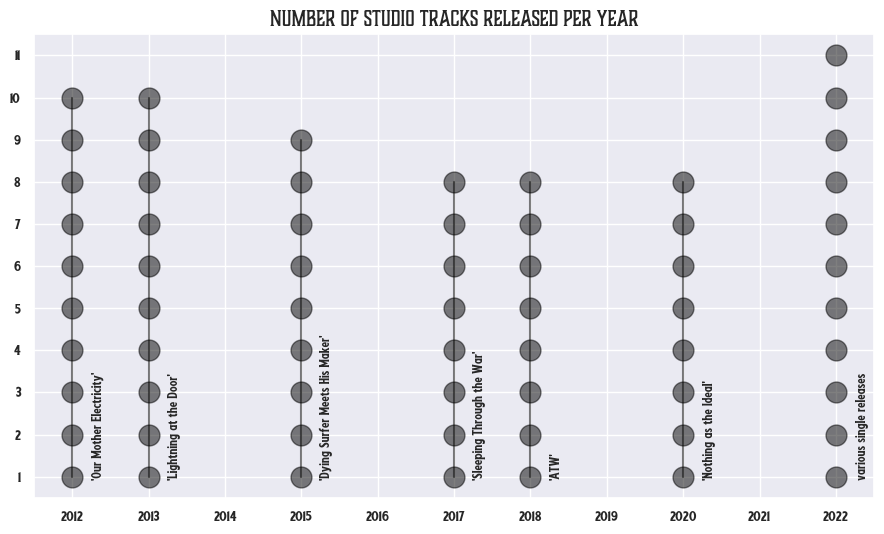

In [16]:
plt.figure(figsize=(9, 5.5))
for date, count in counts.items():
    y_values = list(range(1, count + 1))
    plt.plot([date.to_timestamp()] * count, y_values, marker='o', color='#00000080', markersize=15, linestyle='None')
    if date.year  in [2012, 2013, 2015, 2017, 2018, 2020]:
        plt.plot([date.to_timestamp(), date.to_timestamp()], [1, count], color='#00000080', linestyle='-')

plt.xlabel('')
plt.ylabel('')
plt.title('Number of studio tracks released per year', fontproperties=prop, fontsize=15)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.text(pd.Timestamp('2012-04-01'), 1, "'Our Mother Electricity'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2013-04-01'), 1, "'Lightning at the Door'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2015-04-01'), 1, "'Dying Surfer Meets His Maker'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2017-04-01'), 1, "'Sleeping Through the War'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2018-04-01'), 1, "'ATW'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2020-04-01'), 1, "'Nothing as the Ideal'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2022-04-01'), 1, "various single releases", fontsize=12, rotation=90, fontproperties=prop2)
plt.yticks(range(1, 12), fontproperties=prop2, fontsize=13)
plt.ylim(0.5, 11.5)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.tight_layout()
plt.show()

The album 'Lightning at the Door' was released online in 2013 and as a re-released as a record in 2016. In 2022 the band released 11 new tracks, but not on an album.

But let's now have a close look at the distributions of the variables before we explore the relationships.

### Duration

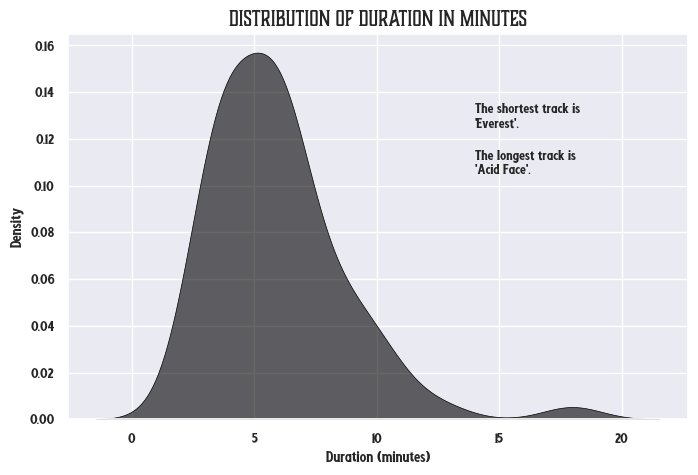

In [17]:
atw['duration_minutes'] = atw['duration_ms'] / (1000 * 60)
plt.figure(figsize=(8,5))
sns.kdeplot(data=atw['duration_minutes'], fill=True, color= '#000000', alpha=0.6,edgecolor='#000000', linewidth=0.5)
plt.xlabel('Duration (minutes)', fontproperties=prop2, fontsize=14)
plt.ylabel('Density', fontproperties=prop2, fontsize=14)
plt.title('Distribution of Duration in minutes', fontproperties=prop, fontsize=15)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.text(14, 0.125,f"The shortest track is \n'{atw.loc[atw['duration_ms'].idxmin(), 'name']}'.", fontsize=13, fontproperties=prop2)
plt.text(14, 0.105,f"The longest track is \n'{atw.loc[atw['duration_ms'].idxmax(), 'name']}'.", fontsize=13, fontproperties=prop2)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.show();

Most tracks are about 5 minutes long, but as an honorable rock band there are of course some really long tracks as well.

### Popularity

Lets have a look at the popularity again. (The popularity of a track is a value between 0 and 100, with 100 being the most popular.)

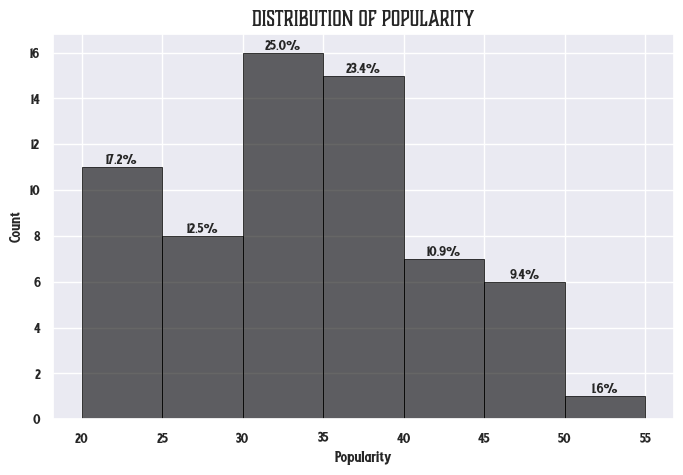

In [18]:
bin_boundaries = np.arange(20,60,5)
plt.figure(figsize=(8,5))
sns.histplot(atw['popularity'], color='#000000', edgecolor='#000000', alpha=.6,linewidth=0.5, bins=bin_boundaries, stat='count')
plt.xlabel('Popularity', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.title('Distribution of Popularity', fontproperties=prop, fontsize=15)
plt.xticks(np.arange(20, 60, 5),fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
counts, _ = np.histogram(atw['popularity'], bins=bin_boundaries)
total_count = len(atw['popularity'])
percentages = [(count / total_count) * 100 for count in counts]

for i, count in enumerate(counts):
    plt.text(bin_boundaries[i] + (bin_boundaries[i + 1] - bin_boundaries[i]) / 2, count, f'{percentages[i]:.1f}%', ha='center', va='bottom', fontsize=13,fontproperties=prop2)

plt.show();

I don't have a comparison just yet, but I assume that these are rather weak popularity ratings.

### Danceability

How suitable are the tracks for dancing? A value of 0.0 is least danceable and 1.0 is most danceable. I perceive the band's music less as "danceable" music. (Of course, you can probably always move somehow).

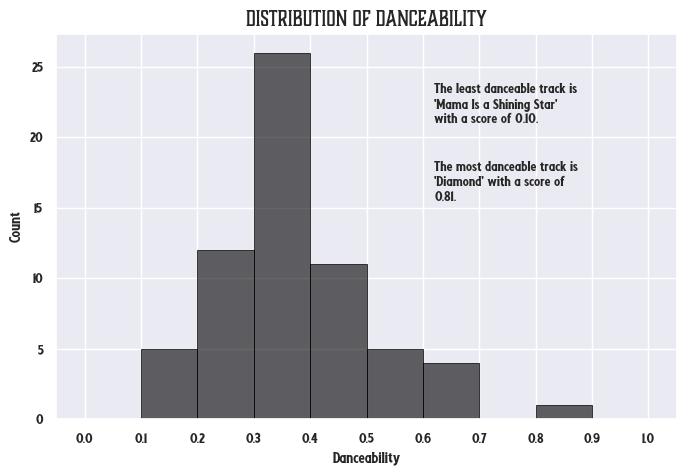

In [19]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['danceability'], color='#000000', alpha=.6, edgecolor='#000000', linewidth=0.5, bins=bin_boundaries, stat='count')
plt.xlabel('Danceability', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.title('Distribution of Danceability', fontproperties=prop, fontsize=15)
plt.yticks(np.arange(0, 30, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties=prop2, fontsize=13)
plt.text(0.62, 21,f"The least danceable track is \n'{atw.loc[atw['danceability'].idxmin(), 'name']}' \nwith a score of {atw['danceability'].min():.2f}.",fontproperties=prop2, fontsize=13)
plt.text(0.62, 15.5,f"The most danceable track is \n'{atw.loc[atw['danceability'].idxmax(), 'name']}' with a score of \n{atw['danceability'].max():.2f}.", fontproperties=prop2, fontsize=13)
plt.show();

The values are higher than expected. I'm honestly surprised that the track "Diamond" has such a high danceability score. I perceive this song rather quiet and slow but my perception relates more to the singing. The rhythm is quite stable and the tap tempo is quite high. In the documentation they say that the danceability score is based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity so this may explain the high score. The song 'Mama Is a Shining Star" is indeed little danceable, sounds very squeric. 

We'll probably find out more about this score when we look into relationships.

Let's have a look at

### Energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

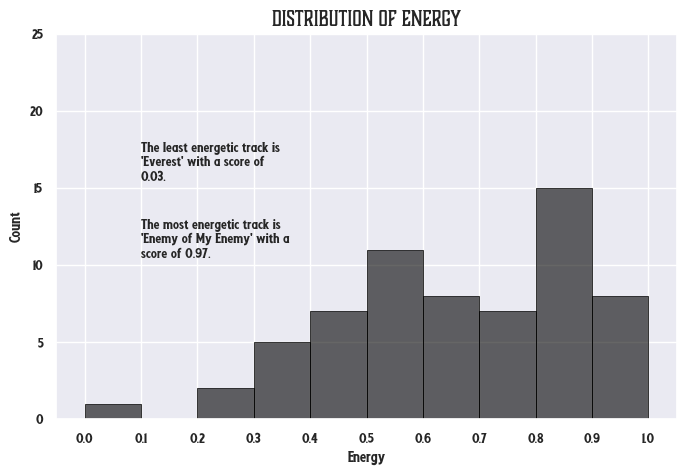

In [20]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['energy'],  color='#000000', edgecolor='#000000', alpha=.6, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Energy', fontproperties=prop, fontsize=15)
plt.xlabel('Energy', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 30, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=13)
plt.text(0.1, 15.5,f"The least energetic track is \n'{atw.loc[atw['energy'].idxmin(), 'name']}' with a score of \n{atw['energy'].min():.2f}.", fontproperties=prop2, fontsize=13)
plt.text(0.1, 10.5,f"The most energetic track is \n'{atw.loc[atw['energy'].idxmax(), 'name']}' with a \nscore of {atw['energy'].max():.2f}.", fontproperties=prop2, fontsize=13)
plt.show();

There is a very wide range, but most songs are rather energetic. I agree that 'Everest' isn't and 'Enemy of My Enemy' is an energetic track.

### Loudness

This variable describes the overall loudness of a track in decibels (dB)

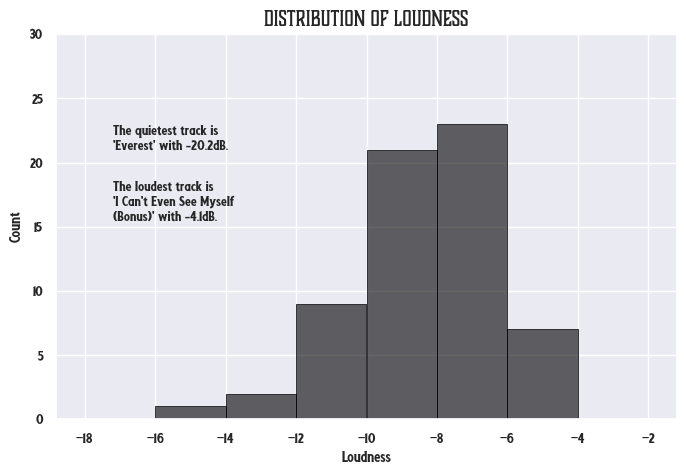

In [21]:
bin_boundaries = np.arange(-18, 0, 2)
plt.figure(figsize=(8,5))
sns.histplot(atw['loudness'], color='#000000', edgecolor='#000000', alpha=.6, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Loudness', fontproperties=prop, fontsize=15)
plt.xlabel('Loudness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0,35,5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(-18, 0, 2),fontproperties=prop2, fontsize=13)
plt.text(-17.2, 21,f"The quietest track is \n'{atw.loc[atw['loudness'].idxmin(), 'name']}' with {atw['loudness'].min():.1f}dB.", fontproperties=prop2, fontsize=13)
plt.text(-17.2, 15.5,f"The loudest track is \n'I Can't Even See Myself \n(Bonus)' with {atw['loudness'].max():.1f}dB.", fontproperties=prop2, fontsize=13)
plt.show();

Here again 'Everest' has the lowest quore. That's propably no coincidence. The song 'I can't Even See Myself' is rather atypical for the band, much heavier than usual and with screaming vocals. So the high loudness score seems alright.

### Speechiness

Speechiness detects the presence of spoken words in a track. The documentation gives a rough orientation:
- values > 0.66 describe: track probably made entirely of spoken words
- 0.33 > values < 0.66: track may contain both music and speech
- values < 0.33: music and other non-speech-like track

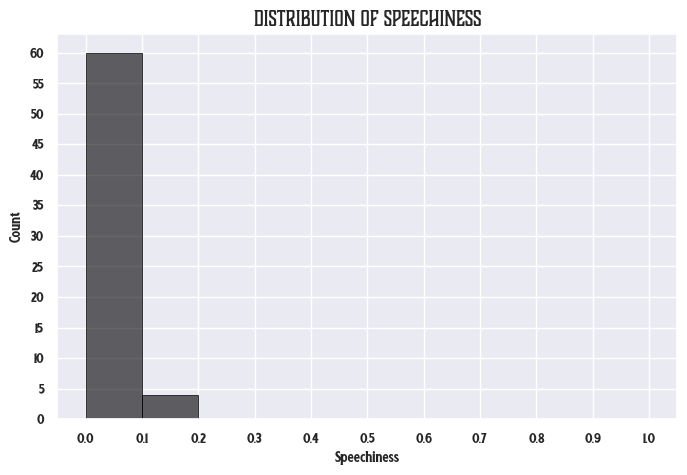

In [22]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['speechiness'], color='#000000', edgecolor='#000000', alpha=.6, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Speechiness', fontproperties=prop, fontsize=15)
plt.xlabel('Speechiness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 65, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties=prop2, fontsize=13)
plt.show();

All tracks are above any suspicion of containing spoken elements.

### Acousticness

I can't think of an acoustic song by All Them Witches. Let's check if I'm right.

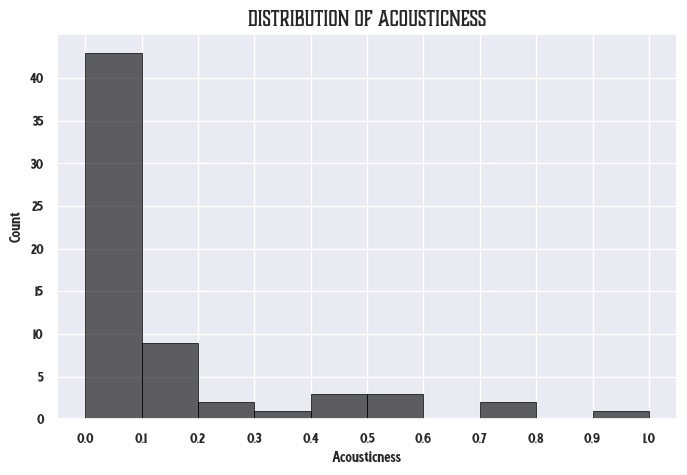

In [23]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['acousticness'], color='#000000', edgecolor='#000000', alpha=.6, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Acousticness', fontproperties=prop, fontsize=15)
plt.xlabel('Acousticness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 45, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=13)
plt.show();

Interesting. Let's see which songs have reached higher scores.

In [24]:
acoustic_top_3 = atw.nlargest(3,'acousticness')[['name', 'acousticness']].reset_index(drop=True)
acoustic_top_3 = custom_styling(acoustic_top_3)
acoustic_top_3

,name,acousticness
0,Everest,0.994000
1,Mellowing,0.797000
2,The Children of Coyote Woman,0.767000


"Everest" is a pure guitar instrumental, but in my opinion an electric guitar is used in it. But in fact, "Mellowing" and "The Children of Coyote Woman" are acoustic.

What about

### Instrumentalness

There are a couple of instrumental songs from the band.

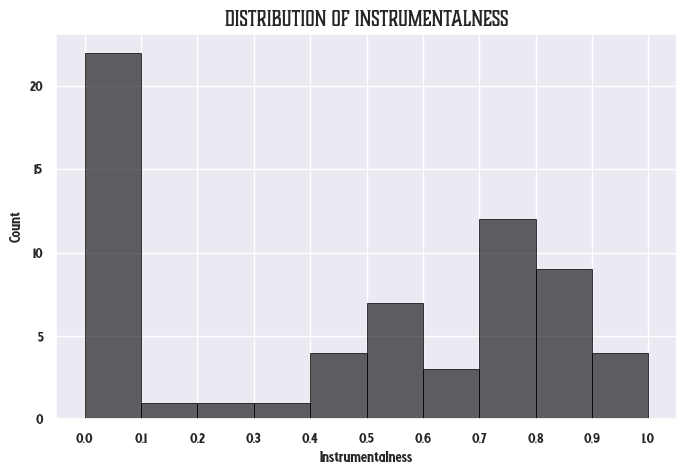

In [25]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['instrumentalness'], color='#000000', edgecolor='#000000', alpha=.6 ,linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Instrumentalness', fontproperties=prop, fontsize=15)
plt.xlabel('Instrumentalness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 25, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=13)
plt.show();

Indeed, quite a lot. But are all of them true instrumentals?

In [26]:
instrumental_top10 = atw.nlargest(10,'instrumentalness')[['name', 'instrumentalness']].reset_index(drop=True)
instrumental_top10 = custom_styling(instrumental_top10)
instrumental_top10

,name,instrumentalness
0,Slow City,0.949000
1,Mama Is a Shining Star,0.948000
2,Holding Your Breath Across the River,0.911000
3,Guns,0.902000
4,Tiger's Pit,0.898000
5,Rats in Ruin,0.888000
6,Instrumental 2 (Welcome To The Caveman Future),0.888000
7,Enemy of My Enemy,0.854000
8,Until It Unwinds,0.846000
9,This Is Where It Falls Apart,0.839000


Well, yes, "Slow City" and "Mama is a Shining Star" indeed are instrumentals. But "Holding Your Breath Across the River" is *not*. Interestingly it contains spoken words and no vocals. (So it should definitely have a higher speechiness score...) 

Most of the tracks in this list clearly contain vocals while true instrumentals are missing! So in my eyes, you can't really rely on this value.

Let's check

### Liveness

The scores should be low as I have removed all live albums from this analysis.

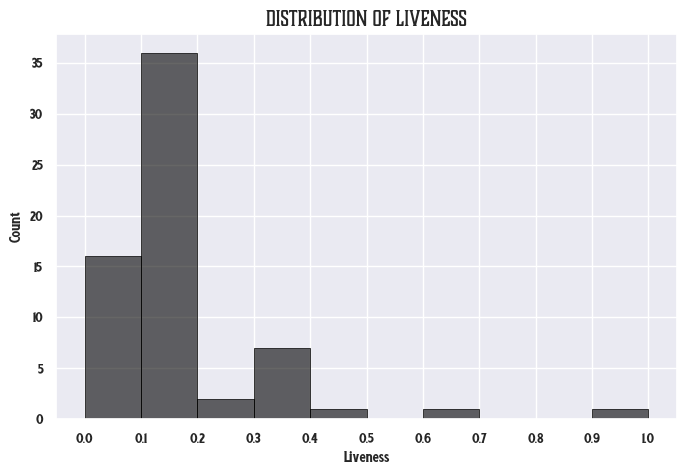

In [27]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['liveness'], color='#000000', edgecolor='#000000', alpha=.6, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Liveness', fontproperties=prop, fontsize=15)
plt.xlabel('Liveness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 40, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=13)
plt.show();

In [28]:
liveness_top2 = atw.nlargest(2,'liveness')[['name', 'liveness']].reset_index(drop=True)
liveness_top2 = custom_styling(liveness_top2)
liveness_top2

,name,liveness
0,6969 WXL THE CAGE,0.920000
1,L'hotel Serein,0.649000


I'm pretty sure both tracks were recorded in the studio. Especially "6969 WXL THE CAGE" contains countless gimmicks that were obviously mixed in. So this is another score I don't rely on too much.

Let's have a look at the 

### Valence

I'm interested in the valence value. Remember: It's a value between 0 and 1 while 0 means negative (sad, depressed, angry, etc.) and 1 means positive (happy, cheerful, euphoric, etc.). I assume that the values for this band will be closer to 0...

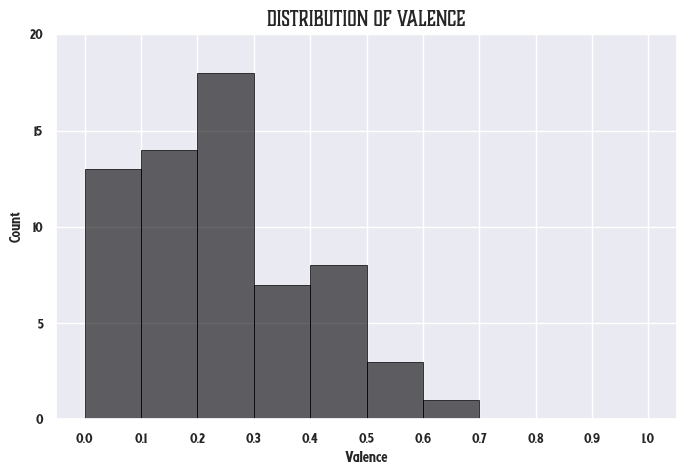

In [29]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['valence'], color='#000000', edgecolor='#000000', alpha=.6, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Valence', fontproperties=prop, fontsize=15)
plt.xlabel('Valence', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 21, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties=prop2, fontsize=13)
plt.show();

In [30]:
valence_top5 = atw.nlargest(5,'valence')[['name', 'valence']].reset_index(drop=True)
valence_top5 = custom_styling(valence_top5)
valence_top5

,name,valence
0,Surface-To-Air Whistle,0.611000
1,Romany Dagger,0.589000
2,The Urn,0.520000
3,Alabaster,0.512000
4,Half-Tongue,0.494000


Indeed, the mood of the songs is rather gloomy. But that "Surface-To-Air Whistle" is the happiest song of them - HOW gloomy are the other ones?

Let's talk about the

### Tempo

This is the speed of a song, in beats per minute (BPM)

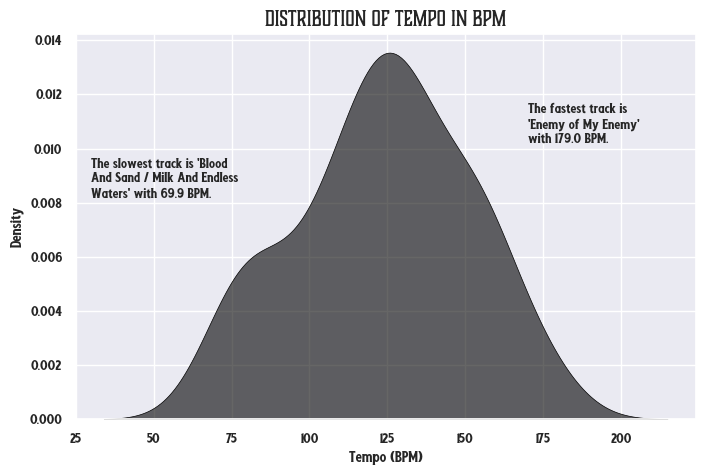

In [31]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=atw['tempo'], fill=True, color= '#000000', alpha=0.6,edgecolor='#000000', linewidth=0.5)
plt.xlabel('Tempo (BPM)', fontproperties=prop2, fontsize=14)
plt.ylabel('Density', fontproperties=prop2, fontsize=14)
plt.title('Distribution of Tempo In BPM', fontproperties=prop, fontsize=15)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.text(30, 0.0082, f"The slowest track is 'Blood \nAnd Sand / Milk And Endless \nWaters' with {atw['tempo'].min():.1f} BPM.", fontproperties=prop2, fontsize=13)
plt.text(170, 0.0102,f"The fastest track is \n'{atw.loc[atw['tempo'].idxmax(), 'name']}' \nwith {atw['tempo'].max():.1f} BPM.", fontproperties=prop2, fontsize=13)
plt.show();

We see that most of the songs are in the 125 BPM range. I think that's a very typical rock tempo, rather brisk. In Italian you would say 'allegro'.

The most energetic song "Enemy of My Enemy" is also the fastest.

Let's now have a look at

### Time Signature

The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

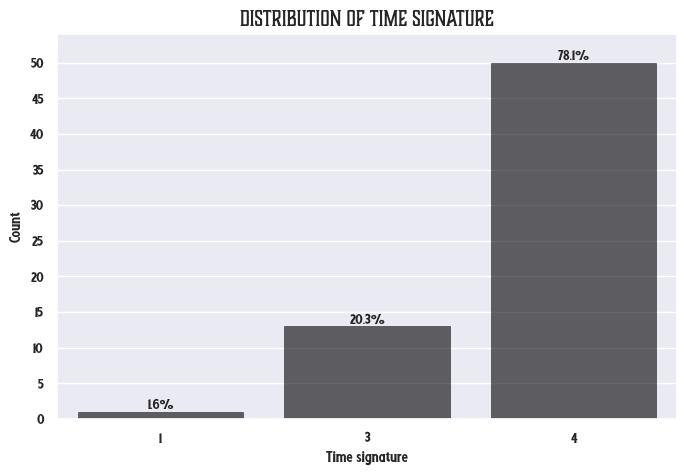

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='time_signature', data=atw, color='#000000', edgecolor='#000000', alpha=.6, linewidth=0.5)
plt.title('Distribution of Time Signature', fontproperties=prop, fontsize=15)
plt.xlabel('Time signature', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 55, 5), fontproperties=prop2, fontsize=13) 
plt.xticks(fontproperties=prop2, fontsize=13) 
plt.ylim(0,54)
plt.grid(True, axis='y') 
total = float(len(atw))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=13)
plt.show();

Ok, by far most tracks are in 3/4 or 4/4. But a couple of questions arise here.

Remember what the documentation said: *The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4"*. This assumes, that all songs are in a x/4 meter, which is not true in the real world. 

Also, I have no idea how to interpret the time signature in 2 in my data set... (It's only one song, called '41')

Let's have look at the 

### Mode

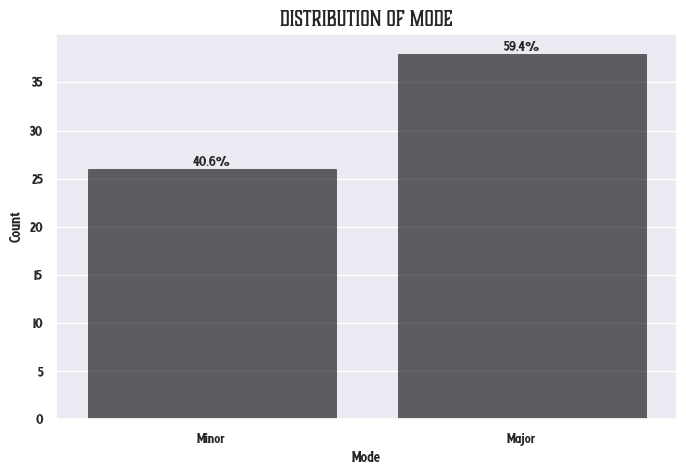

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='mode', data=atw, color='#000000', edgecolor='#000000', alpha=0.6,linewidth=0.5)
plt.title('Distribution of Mode', fontproperties=prop, fontsize=15)
plt.xlabel('Mode', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 40, 5), fontproperties=prop2, fontsize=13) 
plt.ylim(0,40)
plt.xticks([0, 1], ['Minor', 'Major'], fontproperties=prop2, fontsize=13)
total = float(len(atw))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=13)
plt.grid(True, axis='y') 
plt.show();

Most songs are in Major.

Let's have a look at the

### Key

*the following plot is not correct yet, there are no values for category 3 in the dataset, thats why the bars are in wrong position, I will fix that asap*

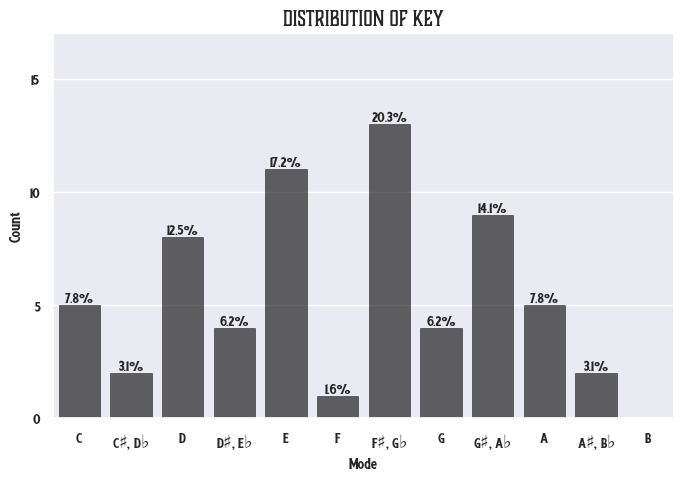

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x='key', data=atw, color='#000000', edgecolor='#000000', alpha=0.6,linewidth=0.5)
plt.title('Distribution of Key', fontproperties=prop, fontsize=15)
plt.xlabel('Mode', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 20, 5), fontproperties=prop2, fontsize=13) 
plt.ylim(0,17)
plt.xlim(-0.5, 11.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['C', r'C$\sharp$, D$\flat$', 'D', r'D$\sharp$, E$\flat$', 'E', 'F', r'F$\sharp$, G$\flat$', 'G', r'G$\sharp$, A$\flat$', 'A', r'A$\sharp$, B$\flat$','B'], fontproperties=prop2, fontsize=13)
total = float(len(atw))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=13)
plt.grid(True, axis='y') 
plt.show();